In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\DERM\DERM_NN_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1.0,1.0,1,1.0,1.0,0.0,0,0.0,2.0,2,...,0.0,0,0.0,0,0.0,0.0,0.0,0,2,0
1,1.0,1.0,2,0.0,0.0,0.0,3,0.0,3.0,0,...,0.0,0,0.0,0,0.0,2.0,2.0,2,0,7
2,2.0,2.0,1,0.0,0.0,0.0,3,0.0,2.0,0,...,0.0,0,0.0,2,0.0,3.0,3.0,2,0,7
3,2.0,2.0,2,1.0,0.0,0.0,2,0.0,2.0,2,...,0.0,0,0.0,2,0.0,2.0,2.0,2,0,7
4,2.0,2.0,1,0.0,0.0,0.0,2,0.0,2.0,0,...,0.0,0,0.0,3,0.0,2.0,2.0,2,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,2.0,2.0,0,2.0,1.0,0.0,0,0.0,0.0,0,...,0.0,0,0.0,3,0.0,0.0,0.0,3,0,70
354,2.0,3.0,2,0.0,0.0,0.0,0,0.0,3.0,2,...,0.0,0,0.0,0,0.0,0.0,0.0,1,0,70
355,2.0,2.0,2,1.0,0.0,0.0,0,0.0,0.0,0,...,0.0,0,0.0,2,0.0,0.0,0.0,2,0,70
356,2.0,1.0,0,3.0,0.0,0.0,0,0.0,0.0,0,...,0.0,0,0.0,0,0.0,0.0,0.0,1,0,70


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	3
float64		column 2	3
int64		column 3	0
float64		column 4	3
float64		column 5	6
float64		column 6	3
int64		column 7	0
float64		column 8	9
float64		column 9	3
int64		column 10	0
float64		column 11	3
float64		column 12	6
int64		column 13	0
int64		column 14	0
float64		column 15	6
float64		column 16	3
float64		column 17	6
float64		column 18	3
float64		column 19	6
int64		column 20	0
int64		column 21	0
float64		column 22	3
float64		column 23	6
float64		column 24	3
float64		column 25	6
int64		column 26	0
float64		column 27	3
int64		column 28	0
float64		column 29	6
float64		column 30	3
float64		column 31	3
int64		column 32	0
int64		column 33	0
int64		column 34	0


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
count,355.000000,355.000000,358.000000,355.000000,352.000000,355.000000,358.000000,349.000000,355.000000,358.000000,...,352.000000,358.000000,355.000000,358.000000,352.000000,355.000000,355.000000,358.000000,358.000000,358.000000
mean,2.078873,1.802817,1.569832,1.363380,0.636364,0.453521,0.170391,0.383954,0.628169,0.530726,...,0.400568,0.474860,0.459155,0.949721,0.454545,0.104225,0.118310,1.877095,0.558659,36.296089
std,0.667637,0.701486,0.900909,1.135115,0.908106,0.959613,0.576394,0.841711,0.992797,0.912352,...,0.858210,0.871705,0.959870,1.129060,0.959690,0.454555,0.495833,0.699324,1.107990,15.324557
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,25.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,35.000000
75%,3.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,49.750000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,75.000000


<AxesSubplot:>

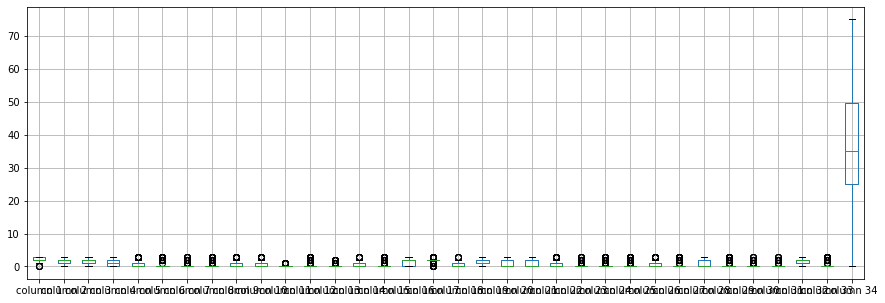

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      2.078873
column 2      1.802817
column 3      1.569832
column 4      1.363380
column 5      0.636364
column 6      0.453521
column 7      0.170391
column 8      0.383954
column 9      0.628169
column 10     0.530726
column 11     0.121127
column 12     0.397727
column 13     0.142458
column 14     0.547486
column 15     0.298295
column 16     1.380282
column 17     1.960227
column 18     0.512676
column 19     1.298295
column 20     0.662011
column 21     0.983240
column 22     0.628169
column 23     0.292614
column 24     0.366197
column 25     0.400568
column 26     0.474860
column 27     0.459155
column 28     0.949721
column 29     0.454545
column 30     0.104225
column 31     0.118310
column 32     1.877095
column 33     0.558659
column 34    36.296089
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
column 1,1.000000,0.436263,0.249972,-0.028878,-0.004144,0.030749,-0.115620,-0.036399,0.142881,0.183331,...,-0.020708,0.152887,-0.005618,0.038713,-0.016861,-0.008782,0.006662,0.092945,-0.013796,-0.005339
column 2,0.436263,1.000000,0.346131,-0.065570,-0.012033,-0.072980,-0.097239,-0.075871,0.303934,0.295150,...,-0.085757,0.198375,-0.124499,0.028649,-0.111461,-0.015514,-0.011544,-0.009612,-0.135493,0.013827
column 3,0.249972,0.346131,1.000000,-0.058131,0.238715,0.325179,-0.176715,0.293844,0.302631,0.261495,...,0.287261,0.350007,0.286146,-0.252643,0.273093,-0.088916,-0.132682,0.124812,0.275099,0.138493
column 4,-0.028878,-0.065570,-0.058131,1.000000,0.275023,0.413442,-0.146948,0.357210,-0.301757,-0.156399,...,0.367724,-0.194448,0.365809,0.011642,0.384396,-0.177199,-0.187669,0.058162,0.388075,0.044854
column 5,-0.004144,-0.012033,0.238715,0.275023,1.000000,0.395703,-0.165302,0.383202,-0.082741,0.009073,...,0.414804,-0.011844,0.375929,0.010838,0.392184,-0.138681,-0.160397,0.126648,0.383635,0.064417
column 6,0.030749,-0.072980,0.325179,0.413442,0.395703,1.000000,-0.140746,0.861251,-0.280520,-0.255748,...,0.883059,-0.119740,0.911729,0.088026,0.892740,-0.094595,-0.114188,0.265446,0.903924,0.096506
column 7,-0.115620,-0.097239,-0.176715,-0.146948,-0.165302,-0.140746,1.000000,-0.135244,0.219723,-0.007320,...,-0.122501,-0.161487,-0.140513,-0.012624,-0.141708,0.783505,0.844641,-0.093833,-0.136311,-0.371368
column 8,-0.036399,-0.075871,0.293844,0.357210,0.383202,0.861251,-0.135244,1.000000,-0.288700,-0.265217,...,0.882017,-0.103835,0.886061,0.125489,0.872658,-0.083249,-0.111226,0.282828,0.888903,0.104676
column 9,0.142881,0.303934,0.302631,-0.301757,-0.082741,-0.280520,0.219723,-0.288700,1.000000,0.658232,...,-0.276431,0.479095,-0.286956,-0.418172,-0.285672,0.231681,0.259100,-0.086656,-0.283220,-0.078282
column 10,0.183331,0.295150,0.261495,-0.156399,0.009073,-0.255748,-0.007320,-0.265217,0.658232,1.000000,...,-0.260976,0.485260,-0.255963,-0.425421,-0.261153,-0.059080,-0.018219,0.027887,-0.255333,0.036412


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [34,34+12,34+12+12,34+12+12+12,34+12+12+12+12,34+12+12+12+12+12,34+12+12+12+12+12+12,34+12+12+12+12+12+12+12,34+12+12+12+12+12+12,34+12+12+12+12+12,34+12+12+12+12,34+12+12+12,34+12+12,34+12,34], vae_layer = False, seed = 12)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [34]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 76.4970422224565
Epoch: 1 , loss: 76.49656226418234
Epoch: 2 , loss: 76.3655610518022
Epoch: 3 , loss: 76.25074664029208
Epoch: 4 , loss: 76.2048511505127
Epoch: 5 , loss: 75.91354127363725
Epoch: 6 , loss: 76.0603141784668
Epoch: 7 , loss: 75.3480602611195
Epoch: 8 , loss: 74.61390928788619
Epoch: 9 , loss: 72.61336933482777
Epoch: 10 , loss: 69.70338734713468
Epoch: 11 , loss: 68.66236339915882
Epoch: 12 , loss: 68.17120170593262
Epoch: 13 , loss: 67.50375487587668
Epoch: 14 , loss: 66.97380603443493
Epoch: 15 , loss: 66.79919225519353
Epoch: 16 , loss: 66.84874534606934
Epoch: 17 , loss: 66.49760020862927
Epoch: 18 , loss: 66.32509942488237
Epoch: 19 , loss: 66.03488887440075
Epoch: 20 , loss: 65.91925256902522
Epoch: 21 , loss: 65.79648156599565
Epoch: 22 , loss: 65.6270488392223
Epoch: 23 , loss: 65.65836143493652
Epoch: 24 , loss: 65.39340019226074
Epoch: 25 , loss: 64.8153488852761
Epoch: 26 , l

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(358, 34)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      2.0
column 2      1.0
column 3      1.0
column 4      1.0
column 5      0.0
column 6      0.0
column 7      2.0
column 8      0.0
column 9      3.0
column 10     2.0
column 11     0.0
column 12     0.0
column 13     0.0
column 14     1.0
column 15     0.0
column 16     1.0
column 17     1.0
column 18     1.0
column 19     1.0
column 20     0.0
column 21     0.0
column 22     0.0
column 23     0.0
column 24     0.0
column 25     0.0
column 26     0.0
column 27     0.0
column 28     0.0
column 29     0.0
column 30     0.0
column 31     1.0
column 32     1.0
column 33     1.0
column 34    12.0
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\DERM.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,0.0,0.0,0,0.0,0.000000,0.0,0,0.0,0.0,0,...,0.0,0,0.0,0,0.0,0.0,0.0,0,0,0
1,0.0,0.0,0,0.0,0.000000,0.0,0,0.0,0.0,0,...,0.0,0,0.0,0,0.0,0.0,0.0,0,0,0
2,0.0,0.0,0,0.0,0.000000,0.0,0,0.0,0.0,0,...,0.0,0,0.0,0,0.0,0.0,0.0,0,0,0
3,0.0,0.0,0,0.0,0.000000,0.0,0,0.0,0.0,0,...,0.0,0,0.0,0,0.0,0.0,0.0,0,0,0
4,0.0,0.0,0,0.0,0.000000,0.0,0,0.0,0.0,0,...,0.0,0,0.0,0,0.0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,0.0,0.0,0,0.0,0.000000,0.0,0,0.0,0.0,0,...,0.0,0,0.0,0,0.0,0.0,0.0,0,0,0
354,0.0,0.0,0,0.0,0.000000,0.0,0,0.0,0.0,0,...,0.0,0,0.0,0,0.0,0.0,0.0,0,0,0
355,0.0,0.0,0,0.0,0.000000,0.0,0,0.0,0.0,0,...,0.0,0,0.0,0,0.0,0.0,0.0,0,0,0
356,0.0,0.0,0,0.0,0.000000,0.0,0,0.0,0.0,0,...,0.0,0,0.0,0,0.0,0.0,0.0,0,0,0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(9.989205414531394, 758.0725558942231)

In [17]:
NRMS=numerator/denominator
NRMS


0.013177109943979066

In [18]:
new_df.iloc[66,:]

column 1      2.0
column 2      0.0
column 3      0.0
column 4      3.0
column 5      0.0
column 6      0.0
column 7      0.0
column 8      0.0
column 9      0.0
column 10     0.0
column 11     0.0
column 12     0.0
column 13     0.0
column 14     0.0
column 15     2.0
column 16     2.0
column 17     2.0
column 18     0.0
column 19     0.0
column 20     0.0
column 21     3.0
column 22     0.0
column 23     0.0
column 24     0.0
column 25     0.0
column 26     0.0
column 27     0.0
column 28     0.0
column 29     0.0
column 30     0.0
column 31     0.0
column 32     2.0
column 33     0.0
column 34    22.0
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1.0,1.0,1,1.0,1.000000,0.0,0,0.0,2.0,2,...,0.0,0,0.0,0,0.0,0.0,0.0,0,2,0
1,1.0,1.0,2,0.0,0.000000,0.0,3,0.0,3.0,0,...,0.0,0,0.0,0,0.0,2.0,2.0,2,0,7
2,2.0,2.0,1,0.0,0.000000,0.0,3,0.0,2.0,0,...,0.0,0,0.0,2,0.0,3.0,3.0,2,0,7
3,2.0,2.0,2,1.0,0.000000,0.0,2,0.0,2.0,2,...,0.0,0,0.0,2,0.0,2.0,2.0,2,0,7
4,2.0,2.0,1,0.0,0.000000,0.0,2,0.0,2.0,0,...,0.0,0,0.0,3,0.0,2.0,2.0,2,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,2.0,2.0,0,2.0,1.000000,0.0,0,0.0,0.0,0,...,0.0,0,0.0,3,0.0,0.0,0.0,3,0,70
354,2.0,3.0,2,0.0,0.000000,0.0,0,0.0,3.0,2,...,0.0,0,0.0,0,0.0,0.0,0.0,1,0,70
355,2.0,2.0,2,1.0,0.000000,0.0,0,0.0,0.0,0,...,0.0,0,0.0,2,0.0,0.0,0.0,2,0,70
356,2.0,1.0,0,3.0,0.000000,0.0,0,0.0,0.0,0,...,0.0,0,0.0,0,0.0,0.0,0.0,1,0,70


In [20]:
imputations[-1].to_excel("DERM_NN_1(imp).xlsx", index=False, header=False)